# Problems with the Predictors

## Errors in the Predictors

* The typical regression model $Y=X\beta+\epsilon$ allows for y being measured with error by having the $\epsilon$ term, but what if $X$ is measured with error?
* For observational data, $X$ can be considered a random variable, but the regression inference proceeds conditional on a fixed value of $X$. So, the observerd $Y$ is conditional to fixed values of $X$.

Suppose that observed ($x_i^{obs}, y_i^{obs}$) have the following relationship with the true values ($x_i^{true}, y_i^{true}$)


<p>&nbsp;</p>
\begin{split}
y_i^{obs} = y_i^{true}+ \epsilon_i \\
x_i^{obs} = x_i^{true}+ \delta_i
\end{split}
<p>&nbsp;</p>

Thus, the $y_i^{true} = \beta_0 + \beta_1 x_i^{true}$ will be given by:

<p>&nbsp;</p>
\begin{split}
y_i^{obs} = \beta_0 + \beta_1 x_i^{obs} + (\epsilon_1- \beta_i \delta_i)
\end{split}
<p>&nbsp;</p>

And the variance for the observational data $\sigma_x^2$:

<p>&nbsp;</p>
\begin{split}
\sigma_x^2  \sum(x_i^{true} - \bar x^{true} /n
\end{split}
<p>&nbsp;</p>

where $\sigma_x^2$ is the sample variance of $X^{true}$ while for a controlled experiment we can view it as just a numerical measure of the spread of the design. Similarly;

<p>&nbsp;</p>
\begin{split}
E \hat \beta_1 = \beta_1 \frac{1}{1+ \sigma_{\delta}^2/ \sigma_x^2}
\end{split}
<p>&nbsp;</p>

1. **Observational data**: If $\sigma_{\delta}$ is much smaller than $\sigma_x^2$, then the problem can be ignored. That means that, if the scale of variation is small in relation to the range of $X$, then we should not be too concerned.

2. **controlled experiments**: Two ways errors in $X$ may arise. (1) measuring imprecision; if we repeat many times, we will get different $x^{obs}$ but the same $x^{true}$. (2) estimate imprecision; if we repeat many times, we will get the same $x^{obs}$ but different $x^{true}$.

If the error cannot be ignored, then we must find a new method to estimate $\hat \beta_1$.

<p>&nbsp;</p>
\begin{split}
\frac{y - \bar y}{SD_y} = r \frac{(x - \bar x)}{SD_x} \\
\end{split}
<p>&nbsp;</p>
 so:
 
 <p>&nbsp;</p>
\begin{split}
\hat \beta_1 = r \frac{SD_y}{SD_x}
\end{split}
<p>&nbsp;</p>

In [ ]:
library(faraway)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


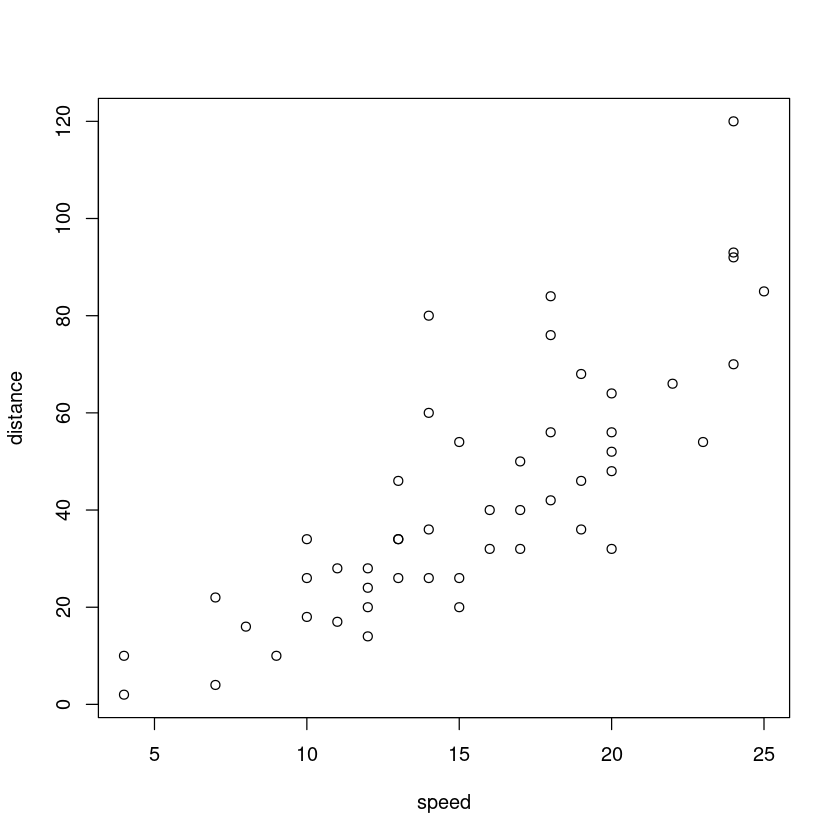

In [3]:
data(cars)
plot(dist ~ speed, data = cars, ylab = "distance")
g = lm(dist ~ speed, data = cars)
summary(g)

* Let's add a measurement error issuer to the predictor

In [5]:
ge1 = lm(dist ~I(speed+rnorm(50)), data = cars)
round(coef(ge1), 4)

(Intercept) I(speed + rnorm(50)) 
            -15.8538               3.8387

In [6]:
ge2 = lm(dist ~I(speed+ 2 * rnorm(50)), data = cars)
round(coef(ge2), 4)

(Intercept) I(speed + 2 * rnorm(50)) 
                -10.4224                   3.5124

In [9]:
ge3 = lm(dist ~I(speed+ 5 * rnorm(50)), data = cars)
round(coef(ge3), 4)

(Intercept) I(speed + 5 * rnorm(50)) 
                 16.2947                   1.9292

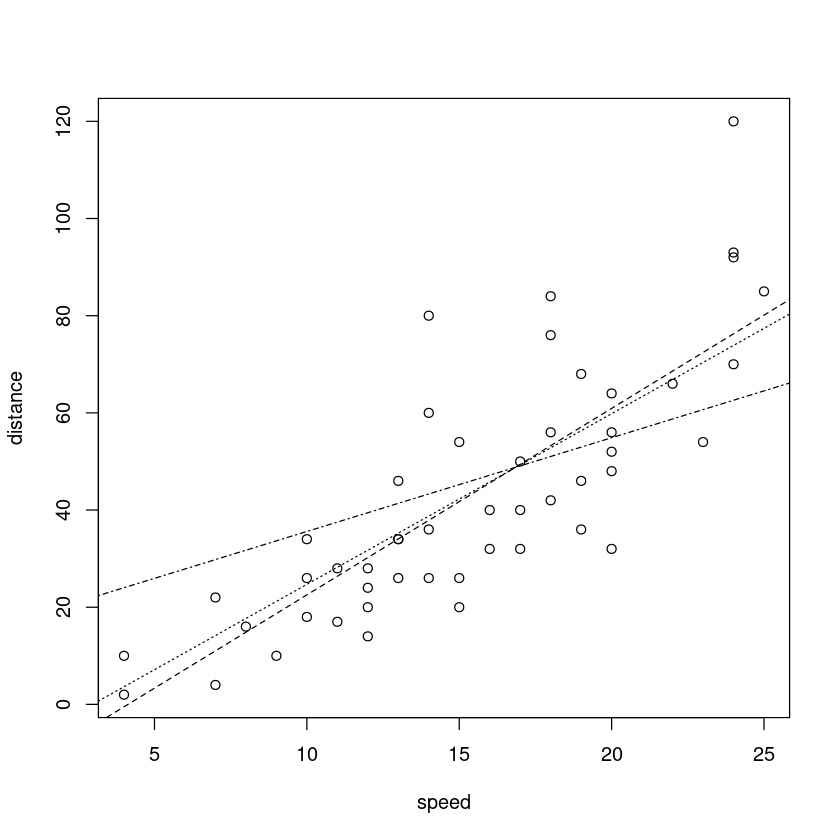

In [10]:
plot(dist ~ speed, data = cars, ylab = "distance")
abline(ge1, lty = 2)
abline(ge2, lty = 3)
abline(ge3, lty = 4)

* The slope becomes shallower as the amount of noise increases

#### Changes of Scale

* $\hat \beta =3.51$ it is easier to parse than $\hat \beta =0.000000351$
* Change of unit might aid interpretability
* Rescaling $x_i$ leaves the $t-test$ and $F-test$ unchanged
* Rescaling also does affect $\hat \sigma^2$ and $R^2$ estimations that will  be rescaled

In [2]:
data(savings)
g = lm(sr ~ pop15 + pop75 + dpi + ddpi, data = savings)
summary(g)


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = savings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2422 -2.6857 -0.2488  2.4280  9.7509 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.5660865  7.3545161   3.884 0.000334 ***
pop15       -0.4611931  0.1446422  -3.189 0.002603 ** 
pop75       -1.6914977  1.0835989  -1.561 0.125530    
dpi         -0.0003369  0.0009311  -0.362 0.719173    
ddpi         0.4096949  0.1961971   2.088 0.042471 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.803 on 45 degrees of freedom
Multiple R-squared:  0.3385,	Adjusted R-squared:  0.2797 
F-statistic: 5.756 on 4 and 45 DF,  p-value: 0.0007904


In [3]:
g = lm(sr ~ pop15 + pop75 + I(dpi/1000) + ddpi, data = savings)
summary(g)


Call:
lm(formula = sr ~ pop15 + pop75 + I(dpi/1000) + ddpi, data = savings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2422 -2.6857 -0.2488  2.4280  9.7509 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.5661     7.3545   3.884 0.000334 ***
pop15        -0.4612     0.1446  -3.189 0.002603 ** 
pop75        -1.6915     1.0836  -1.561 0.125530    
I(dpi/1000)  -0.3369     0.9311  -0.362 0.719173    
ddpi          0.4097     0.1962   2.088 0.042471 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.803 on 45 degrees of freedom
Multiple R-squared:  0.3385,	Adjusted R-squared:  0.2797 
F-statistic: 5.756 on 4 and 45 DF,  p-value: 0.0007904


In [11]:
# rescaling using mean=0 and SD=1
scsav = data.frame(scale(savings))
g = lm(sr ~ ., data = scsav)
summary(g)


Call:
lm(formula = sr ~ ., data = scsav)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.83962 -0.59944 -0.05553  0.54191  2.17635 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  4.291e-16  1.200e-01   0.000   1.0000   
pop15       -9.420e-01  2.954e-01  -3.189   0.0026 **
pop75       -4.873e-01  3.122e-01  -1.561   0.1255   
dpi         -7.451e-02  2.059e-01  -0.362   0.7192   
ddpi         2.624e-01  1.257e-01   2.088   0.0425 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8487 on 45 degrees of freedom
Multiple R-squared:  0.3385,	Adjusted R-squared:  0.2797 
F-statistic: 5.756 on 4 and 45 DF,  p-value: 0.0007904


#### Collinearity

* when some predictors are linear combination of others, the $ X^TX$ is singular, and we have exaxt collinearity
* if $ X^TX$ is not singular, then we have multicollinearity
* Multicollinearity can cause multiple problems with parameter estimates 

How to detect it?
1. Examination of the correlation matrix of the predictors
2. A regression of $x_i$ on all other predictors gives $R_i^2$. $R_i^2$ close to 1 indicates a problem
3. Examine the eigenvalue of $ X^TX$, where $\lambda_1$ is the largest eigenvalue with the others in decreasing orther


<p>&nbsp;</p>
\begin{split}
\kappa = \sqrt{ \frac{\lambda_1}{\lambda_p}}
\end{split}
<p>&nbsp;</p>

where $\kappa \geq 30 $ is consider large

* Alternative calculations involve standartizing the predictors and/or excluding the intercept term

<p>&nbsp;</p>
\begin{split}
S_{x_j, x_j} = \sum_i (x_{ij} - \bar x_{ij})^2
\end{split}
<p>&nbsp;</p>

Then

<p>&nbsp;</p>
\begin{split}
var \hat \beta_j = \sigma^2  \left( \frac{1}{1-R_j^2} \right) \frac{1}{S_{x_j, x_j}}
\end{split}
<p>&nbsp;</p>

If $R_j^2$ is close to one, then the variance inflation factor $\left( \frac{1}{1-R_j^2} \right)$ will be large.

In [4]:
data(seatpos)
g =  lm(hipcenter ~ ., data = seatpos)
summary(g)


Call:
lm(formula = hipcenter ~ ., data = seatpos)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.827 -22.833  -3.678  25.017  62.337 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 436.43213  166.57162   2.620   0.0138 *
Age           0.77572    0.57033   1.360   0.1843  
Weight        0.02631    0.33097   0.080   0.9372  
HtShoes      -2.69241    9.75304  -0.276   0.7845  
Ht            0.60134   10.12987   0.059   0.9531  
Seated        0.53375    3.76189   0.142   0.8882  
Arm          -1.32807    3.90020  -0.341   0.7359  
Thigh        -1.14312    2.66002  -0.430   0.6706  
Leg          -6.43905    4.71386  -1.366   0.1824  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.72 on 29 degrees of freedom
Multiple R-squared:  0.6866,	Adjusted R-squared:  0.6001 
F-statistic:  7.94 on 8 and 29 DF,  p-value: 1.306e-05


* The model  already shows signs of multicollinearity. None of the individual p-values were significant, but F-statistics is very significant 

In [5]:
# Pairwise correlation
round(cor(seatpos), 3)

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
Age,1.000,0.081,-0.079,-0.090,-0.170,0.360,0.091,-0.042,0.205
Weight,0.081,1.000,0.828,0.829,0.776,0.698,0.573,0.784,-0.640
HtShoes,-0.079,0.828,1.000,0.998,0.930,0.752,0.725,0.908,-0.797
Ht,-0.090,0.829,0.998,1.000,0.928,0.752,0.735,0.910,-0.799
Seated,-0.170,0.776,0.930,0.928,1.000,0.625,0.607,0.812,-0.731
Arm,0.360,0.698,0.752,0.752,0.625,1.000,0.671,0.754,-0.585
Thigh,0.091,0.573,0.725,0.735,0.607,0.671,1.000,0.650,-0.591
Leg,-0.042,0.784,0.908,0.910,0.812,0.754,0.650,1.000,-0.787
hipcenter,0.205,-0.640,-0.797,-0.799,-0.731,-0.585,-0.591,-0.787,1.000


In [8]:
x = model.matrix(g)[,-1]
# eigein vectors
e = eigen(t(x) %*% x)
round(e$val, 3)

[1] 3653671.363   21479.480    9043.225     298.953     148.395      81.174
[7]      53.362       7.298

In [10]:
# using the formula checking k >= 30
round(sqrt(e$val[1]/e$val), 3)

[1]   1.000  13.042  20.100 110.551 156.912 212.156 261.667 707.549

* There are several eigenvalues and several conditions numbers that are much larger than 30. That means that problems are being caused by more than just one linear combination
* Let's now chec variance inflation factors(VIFs)

In [13]:
# for the first variable Age
round(summary(lm(x[,1] ~ x[, -1]))$r.squared, 3)

[1] 0.499

In [16]:
# the VIF for orthogonal predictor is one and should be considered the baseline
round(1/(1- 0.499), 3)

[1] 1.996

In [18]:
# Let's compute the VIF for all variable using a fuction
round(vif(x), 3)

Age  Weight HtShoes      Ht  Seated     Arm   Thigh     Leg 
  1.998   3.647 307.429 333.138   8.951   4.496   2.763   6.694

* There is much variance inflation. One way to interpret this is $\sqrt{307.4}= 17.5$ as telling us that the SE for the height with shoes is 17.5 times larger than it would have been without collinearity
* The variance inflation will cause substantial instability for the estimates. 

### Solution
* One solution for collinearity is removal. Too many variables are tyring to do the same job of explaining the response. 
* Height, Arm, Thigh and Leg as all highly correlated. We can use only height for simplicity. 

In [19]:
g2 = lm(hipcenter ~ Age + Weight + Ht, data = seatpos)
summary(g2)


Call:
lm(formula = hipcenter ~ Age + Weight + Ht, data = seatpos)

Residuals:
    Min      1Q  Median      3Q     Max 
-91.526 -23.005   2.164  24.950  53.982 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 528.297729 135.312947   3.904 0.000426 ***
Age           0.519504   0.408039   1.273 0.211593    
Weight        0.004271   0.311720   0.014 0.989149    
Ht           -4.211905   0.999056  -4.216 0.000174 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.49 on 34 degrees of freedom
Multiple R-squared:  0.6562,	Adjusted R-squared:  0.6258 
F-statistic: 21.63 on 3 and 34 DF,  p-value: 5.125e-08


* The fit is very similar, but much less predictors were used.